In [42]:
import matplotlib
import numpy 
import matplotlib.pyplot as plt
import math
%matplotlib inline

def printMap(level):
    pixel_plot = plt.figure()
    pixel_plot.add_subplot()
    plt.title("Map")
    pixel_plot = plt.imshow(level, cmap='Greens', interpolation='nearest', origin='upper', vmax=5)
    plt.colorbar(pixel_plot)
    plt.show()

def putPixel(level, position, value):
    x = position[0]
    y = position[1]
    level[y][x] = value

In [43]:
class SearchNode:
    def __init__(self, state, action=-1, prevNode=None):
        self.state = state
        self.action = action
        self.prevNode = prevNode
        self.totalG = 0 # kustannus alusta nykyiseen tilaan
        self.heuristicCost = 0 # Arvioitu kustannus loppuun
        


def traversePath(node, visitFunc):
    if (node == None):
        return # rekursion loppuehto
    traversePath(node.prevNode, visitFunc)
    visitFunc(node)

In [44]:
def breadthFirstSearch(agentState, isGoal, branch):
    # lisää alkutila open listiin
    openList = [SearchNode(agentState)]
    closedList = []
    goaledNode = None

    def isInClosedList(node):
        for n in closedList:
            if(node.state == n.state):
                return True #löytyi
        return False #ei löytynyt

    while len(openList) > 0 and goaledNode == None:
        currentNode = openList[0]
        openList.pop(0)
        if(isInClosedList(currentNode)):
            continue

        # lisää solmu closed listaan
        closedList.append(currentNode)
        if isGoalFound(currentNode):
            goaledNode = currentNode
            continue

        # Laske seuraavat naapurisolmut
        adjacentNodes = branch(currentNode) # kutsu branch funktiota kanditaattien saamiseksi
        for n in adjacentNodes:
            openList.append(n)  


    return goaledNode, openList

In [45]:
def dijkstra(agentState, popBest, isGoal, branch):
    # lisää alkutila open listiin
    openList = [SearchNode(agentState)]
    closedList = []
    goaledNode = None

    def isInClosedList(node):
        for n in closedList:
            if(node.state == n.state):
                return True #löytyi
        return False #ei löytynyt

    while len(openList) > 0 and goaledNode == None:
        currentNode = popBest(openList)

        # lisää solmu closed listaan
        closedList.append(currentNode)
        if isGoalFound(currentNode):
            goaledNode = currentNode
            continue

        # Laske seuraavat naapurisolmut
        adjacentNodes = branch(currentNode) # kutsu branch funktiota kanditaattien saamiseksi
        for n in adjacentNodes:
            if(isInClosedList(n)):
                continue
            closedList.append(n)
            openList.append(n)  


    return goaledNode, openList

In [46]:
# Ratkaistava ongelma

#alkutilanne:
initialState = [1, 0]

# maalifunktio:
def isGoalFound(node):
    return node.state[0] == 4 and node.state[1] == 6   # goal tilassa 0, 6

# actionit taulukoituna: (0 suuntaa)
actions = [[-1, 0], [1, 0],[0, -1], [0, 1]]
#actions = [[-1, 0], [1, 0],[0, -1], [0, 1], [-1, -1], [1, 1], [1, -1], [-1, 1]]

"""
level = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
]
"""

level = [
    [0 for _ in range(20)]  # Tuplataan sarakkeiden määrä 10 -> 20
    for _ in range(18)       # Tuplataan rivien määrä 9 -> 18
]

# Tarkista lopputulos
for row in level:
    print(row)


# Laillisen tilan tarkastusfunktio:
def isLegalState(state):
    x = state[0]
    y = state[1]
    if( x < 0 or y < 0):
        return False
    
    if( y >= len(level) or x >= len(level[0]) ):
        return False
    return True

# Suorittaa annetun actionin nykyisestä tilasta eteenpäin
def makeAction(currentState, actionId):
    deltaAction = actions[actionId]
    newState = []
    for i in range(len(currentState)):
        newState.append(currentState[i]+deltaAction[i])
    return newState

# Suorittaa actionin nykyiseen tilaan ja tekee uuden solmun
def stepAction(prevNode, actionId):
    newState = makeAction(prevNode.state, actionId)
    return SearchNode(newState, actionId, prevNode)

def vectorLen(vec):
    dotProduct = 0
    for value in vec:
        dotProduct += value*value
    return math.sqrt(dotProduct)

def sub(v1, v2):
    result = []
    for i in range(len(v1)):
        result.append(v1[i] - v2[i])
    return result

# branch funktio algoritmille
def getNextNodes(prevNode):
    NextNodes = []
    for actionId in range(len(actions)):
        newNode = stepAction(prevNode, actionId)
        x = prevNode.state[0]
        y = prevNode.state[1]
        levelCost = level[y][x] + 1
        if(isLegalState(newNode.state)):
            #  G-kustannus on edellisten g plus kustannus yhdelle askeleelle:
            newNode.totalG = prevNode.totalG + levelCost*vectorLen(sub(prevNode.state, newNode.state))
            NextNodes.append(newNode) # type: ignore
    return NextNodes

def popBestG(openList):
    # oleta ensimmäinen pienimmäksi
    currentNode = openList[0]
    minIndex = 0
    minG = currentNode.totalG
    for index, item in enumerate(openList):
        itemG = item.totalG
        if( itemG < minG):
            currentNode = item
            minIndex = index
            minG = itemG
    openList.pop(minIndex)
    return currentNode



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0,

In [47]:
#goaledNode, openList = breadthFirstSearch(initialState, isGoalFound, getNextNodes)
goaledNode, openList = dijkstra(initialState, popBestG, isGoalFound, getNextNodes)

In [48]:
def printNode(node):
    print("State:" + str(node.state) + "Action: " + str(node.action))

traversePath(goaledNode, printNode)


State:[1, 0]Action: -1
State:[2, 0]Action: 1
State:[3, 0]Action: 1
State:[4, 0]Action: 1
State:[4, 1]Action: 3
State:[4, 2]Action: 3
State:[4, 3]Action: 3
State:[4, 4]Action: 3
State:[4, 5]Action: 3
State:[4, 6]Action: 3


# jääty kohtaan Hakualgoritmien refaktorointi pythnon mooduuliksi videon alku

Total cost of path: 9.0


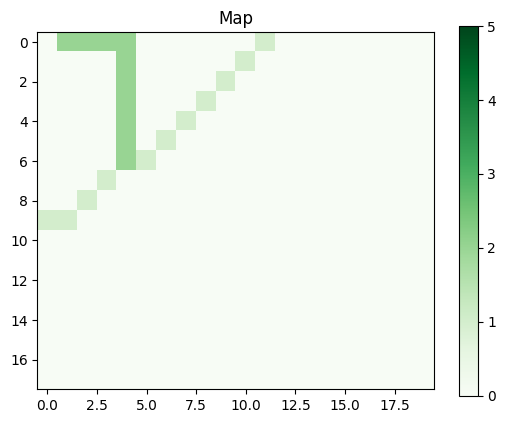

In [49]:


def printNodeOnLevel(node):
    putPixel(level, node.state, 2)

def printOpenNodeOnLevel(node):
    putPixel(level, node.state, 1)

for openNode in openList:
    printOpenNodeOnLevel(openNode)

traversePath(goaledNode, printNodeOnLevel)

print("Total cost of path: " + str(goaledNode.totalG))
printMap(level)

[Source](https://www.youtube.com/watch?v=Q30m_-8nh3Y&list=PLadRxrHJkUqzoVmzO-CQWwhO93IAjChOp&index=18)